# Data Cleaning and Preprocessing for the Original Dataset

Before conducting any sort of data analysis, we must extract the relevant data fields in the original dataset and do some data preprocessing to produce a finalized dataset. Here we're importing the original dataset with the relevant columns, and creating separate tables for each of the 16 games containing the validation error and best score values. This is done to determine the mean validation error and best score achieved for each game, which will later be used to create the final dataset.

In [2]:
import pandas as pd 

initial = pd.read_csv('/Users/AyaHourani 1/Desktop/Atari_Game_Data.csv')
initial.head()
dataset = initial[['Game','TrialNumber', 'SubjID', 'AverageValError', 'BestScore']]

# Setting up separate tables to calculate individual performance

# Setting up separate tables for each game containing validataion error and best score
asterix_dataset = dataset.loc[dataset['Game'] == 'Asterix', ['Game', 'AverageValError', 'BestScore']]
berzerk_dataset = dataset.loc[dataset['Game'] == 'Berzerk', ['Game', 'AverageValError', 'BestScore']]
breakout_dataset = dataset.loc[dataset['Game'] == 'Breakout', ['Game', 'AverageValError', 'BestScore']]
centipede_dataset = dataset.loc[dataset['Game'] == 'Centipede', ['Game', 'AverageValError', 'BestScore']]
demonattack_dataset = dataset.loc[dataset['Game'] == 'DemonAttack', ['Game', 'AverageValError', 'BestScore']]
enduro_dataset = dataset.loc[dataset['Game'] == 'Enduro', ['Game', 'AverageValError', 'BestScore']]
freeway_dataset = dataset.loc[dataset['Game'] == 'Freeway', ['Game', 'AverageValError', 'BestScore']]
frostbite_dataset = dataset.loc[dataset['Game'] == 'Frostbite', ['Game', 'AverageValError', 'BestScore']]
hero_dataset = dataset.loc[dataset['Game'] == 'Hero', ['Game', 'AverageValError', 'BestScore']]
mspacman_dataset = dataset.loc[dataset['Game'] == 'Mspacman', ['Game', 'AverageValError', 'BestScore']]
namethisgame_dataset = dataset.loc[dataset['Game'] == 'NameThisGame', ['Game', 'AverageValError', 'BestScore']]
phoenix_dataset = dataset.loc[dataset['Game'] == 'Phoenix', ['Game', 'AverageValError', 'BestScore']]
riverraid_dataset = dataset.loc[dataset['Game'] == 'Riverraid', ['Game', 'AverageValError', 'BestScore']]
seaquest_dataset = dataset.loc[dataset['Game'] == 'Seaquest', ['Game', 'AverageValError', 'BestScore']]
spaceinvaders_dataset = dataset.loc[dataset['Game'] == 'SpaceInvaders', ['Game', 'AverageValError', 'BestScore']]
venture_dataset = dataset.loc[dataset['Game'] == 'Venture', ['Game', 'AverageValError', 'BestScore']]

# Creating a table with the mean values of validation error and best score for each game
total = [asterix_dataset, berzerk_dataset, breakout_dataset, centipede_dataset, demonattack_dataset, enduro_dataset, freeway_dataset, frostbite_dataset, hero_dataset, mspacman_dataset, namethisgame_dataset, phoenix_dataset, riverraid_dataset, seaquest_dataset, spaceinvaders_dataset, venture_dataset]
game = ['Asterix', 'Berzerk', 'Breakout', 'Centipede', 'DemonAttack', 'Enduro', 'Freeway', 'Frostbite', 'Hero', 'Mspacman', 'NameThisGame', 'Phoenix', 'Riverraid', 'Seaquest', 'SpaceInvaders', 'Venture']
mean_average = []
mean_best_score = []

for data in total:
    mean_average.append(round(data['AverageValError'].mean(), 4))
    mean_best_score.append(round(data['BestScore'].mean(), 4))
    
dataset.head()
print(asterix_dataset['BestScore'])

0     95500.0
1     84500.0
2     99000.0
3     88000.0
4    106500.0
5    331000.0
6    537500.0
7    105500.0
8    130500.0
9    135000.0
Name: BestScore, dtype: float64


## Game Score Scaling

Scores are weighed on a different scale depending on the game, so in order to accurately depict the difficulty level of the game, we must outsource the top scores achieved worldwide. Using these values, we'll then calculate the average top score for each game.

In [3]:
top_asterix = [335500]
top_berzerk = [130050, 104450, 103505, 93450, 66230, 62590, 27880, 23790, 23550]
top_breakout = [864, 834, 825, 812, 667, 532, 511, 456, 424, 420]
top_centipede = [198613, 163278, 137526, 125768, 115451, 112831, 99957, 99907, 97995, 89237]
top_demonattack = [92420, 19500, 16005, 14055, 13530, 9425, 7515, 6510, 5220, 5020]
top_enduro = [5878, 3159.2, 1936.6, 1561.6, 1152.2, 1039.9, 747, 731.3, 609.6, 595.5]
top_freeway = [34, 32, 32, 31, 31, 31, 30]
top_frostbite = [441510, 429370, 416560, 409070, 373710, 343240, 312510, 232360, 186470, 127570]
top_hero = [257310, 161010, 159900, 93125, 75000, 32880]
top_mspacman = [211480, 91850, 86350, 82256, 71000, 68330, 63060, 62690, 61150, 60390]
top_namethisgame = [25220]
top_phoenix = [365240, 98500, 58690, 41550, 25900, 21680, 19110, 6600]
top_riverraid = [837340, 319310, 112700, 102230, 97140, 95530, 82900, 72350, 56120, 51530]
top_seaquest = [381150, 298280, 242740, 189360, 160290, 159000, 155620, 138720, 112190, 106550]
top_spaceinvaders = [111965, 108745, 88550, 35780, 24475, 21700, 19460, 12125, 11745, 10925]
top_venture = [104400]

top_scores = [top_asterix, top_berzerk, top_breakout, top_centipede, top_demonattack, top_enduro, top_freeway, top_frostbite, top_hero, top_mspacman, top_namethisgame, top_phoenix, top_riverraid, top_seaquest, top_spaceinvaders, top_venture]
mean_top_scores = []

for score in top_scores:
    mean_top_scores.append(round(sum(score) / len(score), 4))


## Performance Scaling

Here we're calculating the difficulty level of each game using the mean top scores we calculated and the given best scores from the original dataset. After this, we'll zip all of the data fields we calculated to create a finalized chart that will be used to conduct our analysis.

In [4]:
performance = []
difficulty = []

for (score, top) in zip(mean_best_score, mean_top_scores):
    performance.append(round(((score / top)*100), 2))
    
for score in performance:
    difficulty.append(100 - score)
                                        
data_table = pd.DataFrame(list(zip(game, mean_average, mean_best_score, mean_top_scores, difficulty)), columns=['Game', 'Mean Validation Error', 'Mean Best Score', 'Mean Top Score', 'Difficulty(%)'])
data_table

,Game,Mean Validation Error,Mean Best Score,Mean Top Score,Difficulty(%)
0,Asterix,0.4020,171300.0000,335500.0000,48.94
1,Berzerk,0.3780,5730.0000,70610.5556,91.89
2,Breakout,0.4183,435.0833,634.5000,31.43
3,Centipede,0.4432,66770.5455,124056.3000,46.18
4,DemonAttack,0.5129,6810.0000,18920.0000,64.01
5,Enduro,0.3336,404.5000,1741.0900,76.77
6,Freeway,0.4838,31.1250,31.5714,1.41
7,Frostbite,0.3300,25074.0000,327237.0000,92.34
8,Hero,0.4600,44657.5000,129870.8333,65.61
9,Mspacman,0.4165,32797.4118,85855.6000,61.80


Here we're calculating the performance % for each trial of each game. This is done to later calculate the Cumulative Distribution Function of each game.

In [16]:
# Performance list for each game
asterix_performance = []
berzerk_performance = []
breakout_performance = []
centipede_performance = []
demonattack_performance = []
enduro_performance = []
freeway_performance = []
frostbite_performance = []
hero_performance = []
mspacman_performance = []
namethisgame_performance = []
phoenix_performance = []
riverraid_performance = []
seaquest_performance = []
spaceinvaders_performance = []
venture_performance = []

# Function for calculating the performance % for each game
def performanceCalculator(game, top_score, dataset):
    i = range(16)
    for score in dataset['BestScore']:
        game.append(round(((score / top_score)*100), 2))
        game.sort()
        
performanceCalculator(asterix_performance, mean_top_scores[0], asterix_dataset)
performanceCalculator(berzerk_performance, mean_top_scores[1], berzerk_dataset)
performanceCalculator(breakout_performance, mean_top_scores[2], breakout_dataset)
performanceCalculator(centipede_performance, mean_top_scores[3], centipede_dataset)
performanceCalculator(demonattack_performance, mean_top_scores[4], demonattack_dataset)
performanceCalculator(enduro_performance, mean_top_scores[5], enduro_dataset)
performanceCalculator(freeway_performance, mean_top_scores[6], freeway_dataset)
performanceCalculator(frostbite_performance, mean_top_scores[7], frostbite_dataset)
performanceCalculator(hero_performance, mean_top_scores[8], hero_dataset)
performanceCalculator(mspacman_performance, mean_top_scores[9], mspacman_dataset)
performanceCalculator(namethisgame_performance, mean_top_scores[10], namethisgame_dataset)
performanceCalculator(phoenix_performance, mean_top_scores[11], phoenix_dataset)
performanceCalculator(riverraid_performance, mean_top_scores[12], riverraid_dataset)
performanceCalculator(seaquest_performance, mean_top_scores[13], seaquest_dataset)
performanceCalculator(spaceinvaders_performance, mean_top_scores[14], spaceinvaders_dataset)
performanceCalculator(venture_performance, mean_top_scores[15], venture_dataset)



## Cumulative Distribution Function

Here we're calculating the Cumulative Distribution Function all 16 games given their individual performances. This is done to determine which games will be selected for gaze data analysis; factors considered include the number of trials and difficulty level/performance. 

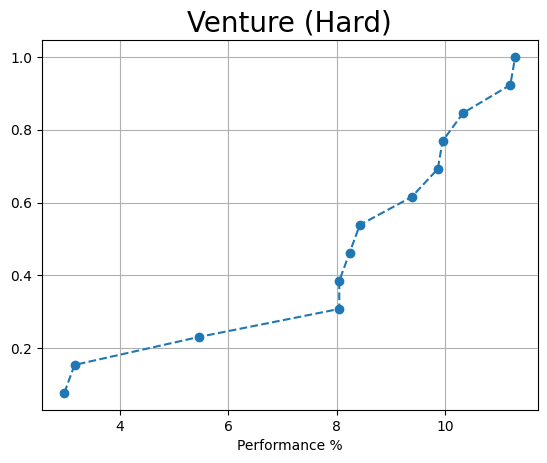

In [17]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Function for CDF and Plotting
def CDF(sorted_data):
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    # Plotting tht CDF
    plt.plot(sorted_data, cdf, marker='o', linestyle='--')
    plt.xlabel('Performance %', fontsize=10)
    title = 'Venture (Hard)'
    plt.title(title, fontsize=20)
    plt.grid(True)
    plt.show()
    
# Displaying each plot for each game
CDF(venture_performance)

## Data Distinction

Here, we're highlighting the mean top score column to distinguish outsourced data from the original data.

In [23]:
def highlight_cols(x):   
    # copy data table to new 
    data_table = x.copy() 
    # select all values to white color 
    data_table.loc[:, :] = 'background-color: white'
    # overwrite values blue color 
    data_table['Mean Top Score'] = 'background-color: lightblue'
    # return color data table 
    return data_table  
 
display(data_table.style.apply(highlight_cols, axis = None)) 

,Game,Mean Validation Error,Mean Best Score,Mean Top Score,Difficulty(%)
0,Asterix,0.402000,171300.000000,335500.000000,48.940000
1,Berzerk,0.378000,5730.000000,70610.555600,91.890000
2,Breakout,0.418300,435.083300,634.500000,31.430000
3,Centipede,0.443200,66770.545500,124056.300000,46.180000
4,DemonAttack,0.512900,6810.000000,18920.000000,64.010000
5,Enduro,0.333600,404.500000,1741.090000,76.770000
6,Freeway,0.483800,31.125000,31.571400,1.410000
7,Frostbite,0.330000,25074.000000,327237.000000,92.340000
8,Hero,0.460000,44657.500000,129870.833300,65.610000
9,Mspacman,0.416500,32797.411800,85855.600000,61.800000


# Data Cleaning and Preprocessing for the Gaze Data

In this section, we're cleaning/preprocessing the gaze data for the 6 games that were selected for analysis. Each game chosen has a minimum of 8 trials, as lower trials would produce less accurate results. To determine which trials to include from each game, the top and bottom 2 trials in terms of performance were selected, resulting in a total of 4 trials for each game. We labelled each game as "easy", "medium", and "hard" using the difficulty level percentages. 

In [2]:
# Gaze positions for all trials
freeway_top79 = []
freeway_top59 = []
freeway_worst55 = []
freeway_worst72 = []
breakout_top205 = []
breakout_top218 = []
breakout_worst58 = []
breakout_worst153 = []
seaquest_top248 = []
seaquest_top241 = []
seaquest_worst135 = []
seaquest_worst87 = []
centipede_top259 = []
centipede_top254 = []
centipede_worst143 = []
centipede_worst69 = []
riverraid_top121 = []
riverraid_top102 = []
riverraid_worst141 = []
riverraid_worst129 = []
venture_top111 = []
venture_top65 = []
venture_worst154 = []
venture_worst133 = []

## Gaze Position Extraction and Reformatting

Here, we're extracting the gaze positions for each game and structuring it. The original gaze data is just a long list of x,y coordinate pairs, starting after the sixth value. So, we must only extract values after the sixth value, and pair the coordinates together.  

In [3]:
# This block is used to extract the gaze positions for all 6 games (24 total trials)

def extractingGaze(game_trial, game):    
    character = '\n'
    gaze_positions = []
    modified_gaze_positions = []

    # Extracting gaze positions
    with open(f'/Users/AyaHourani 1/Desktop/Trials/{game}.txt', 'r') as file:
        for line in file.readlines():
            values = line.split(',')
            # Gaze values start after the sixth value
            gaze_values = values[6:]
            for i in range(0, len(gaze_values)-1, 2):
                gaze_positions.append((gaze_values[i], gaze_values[i+1]))

    # Function for removing '\n' 
    for pair in gaze_positions:
        for coordinate in pair:
            if character in coordinate:
                new_coordinate = coordinate.replace(character, '')
                modified_gaze_positions.append(new_coordinate)
            else:
                modified_gaze_positions.append(coordinate)

    # Pairing modified coordinates to create final gaze positions
    for i in range(0, len(modified_gaze_positions)-1, 2):
        game_trial.append((float(modified_gaze_positions[i]), float(modified_gaze_positions[i+1])))


In [4]:
# Applying function to all trials 
extractingGaze(freeway_top79, 'freeway_top79')
extractingGaze(freeway_top59, 'freeway_top59')
extractingGaze(freeway_worst55, 'freeway_worst55')
extractingGaze(freeway_worst72, 'freeway_worst72')
extractingGaze(breakout_top205, 'breakout_top205')
extractingGaze(breakout_top218, 'breakout_top218')
extractingGaze(breakout_worst58, 'breakout_worst58')
extractingGaze(breakout_worst153, 'breakout_worst153')
extractingGaze(seaquest_top248, 'seaquest_top248')
extractingGaze(seaquest_top241, 'seaquest_top241')
extractingGaze(seaquest_worst135, 'seaquest_worst135')
extractingGaze(seaquest_worst87, 'seaquest_worst87')
extractingGaze(centipede_top259, 'centipede_top259')
extractingGaze(centipede_top254, 'centipede_top254')
extractingGaze(centipede_worst143, 'centipede_worst143')
extractingGaze(centipede_worst69, 'centipede_worst69')
extractingGaze(riverraid_top121, 'riverraid_top121')
extractingGaze(riverraid_top102, 'riverraid_top102')
extractingGaze(riverraid_worst141, 'riverraid_worst141')
extractingGaze(riverraid_worst129, 'riverraid_worst129')
extractingGaze(venture_top111, 'venture_top111')
extractingGaze(venture_top65, 'venture_top65')
extractingGaze(venture_worst154, 'venture_worst154')
extractingGaze(venture_worst133, 'venture_worst133')

Here, we're combining the good(top) and bad(bottom) trials into one list for each game, totalling 2 lists per game. We're then creating a "good" and "bad" label for each game, which will be useful for when we apply the Gaussian Mixture Model to the data.

In [5]:
# Combining the good and bad trials into one list for each game
freeway_good = []
freeway_bad = []
freeway_good.extend(freeway_top79)
freeway_good.extend(freeway_top59)
freeway_bad.extend(freeway_worst55)
freeway_bad.extend(freeway_worst72)

breakout_good = []
breakout_bad = []
breakout_good.extend(breakout_top205)
breakout_good.extend(breakout_top218)
breakout_bad.extend(breakout_worst58)
breakout_bad.extend(breakout_worst153)

seaquest_good = []
seaquest_bad = []
seaquest_good.extend(seaquest_top248)
seaquest_good.extend(seaquest_top241)
seaquest_bad.extend(seaquest_worst135)
seaquest_bad.extend(seaquest_worst87)

centipede_good = []
centipede_bad = []
centipede_good.extend(centipede_top259)
centipede_good.extend(centipede_top254)
centipede_bad.extend(centipede_worst143)
centipede_bad.extend(centipede_worst69)

riverraid_good =[]
riverraid_bad = []
riverraid_good.extend(riverraid_top121)
riverraid_good.extend(riverraid_top102)
riverraid_bad.extend(riverraid_worst141)
riverraid_bad.extend(riverraid_worst129)

venture_good = []
venture_bad = []
venture_good.extend(venture_top111)
venture_good.extend(venture_top65)
venture_bad.extend(venture_worst154)
venture_bad.extend(venture_worst133)

## Finalizing the Lists for each Game 

In [6]:
# Final lists of good/bad trials for function
final_freeway_good = []
final_freeway_bad = []
final_breakout_good = []
final_breakout_bad = []
final_seaquest_good = []
final_seaquest_bad = []
final_centipede_good = []
final_centipede_bad = []
final_riverraid_good = []
final_riverraid_bad = []
final_venture_good = []
final_venture_bad = []

In [7]:
# Labelling the data points as good/bad for each game

def goodLabel(game, final_list):
    for data in game:
        data1 = list(data)
        data1.append('good')
        result = tuple(data1)
        data = result
        final_list.append(data)
        
def badLabel(game, final_list):
    for data in game:
        data1 = list(data)
        data1.append('bad')
        result = tuple(data1)
        data = result
        final_list.append(data)

In [8]:
# Final good lists
goodLabel(freeway_good, final_freeway_good)
goodLabel(breakout_good, final_breakout_good)
goodLabel(seaquest_good, final_seaquest_good)
goodLabel(centipede_good, final_centipede_good)
goodLabel(riverraid_good, final_riverraid_good)
goodLabel(venture_good, final_venture_good)
# Final bad lists
badLabel(freeway_bad, final_freeway_bad)
badLabel(breakout_bad, final_breakout_bad)
badLabel(seaquest_bad, final_seaquest_bad)
badLabel(centipede_bad, final_centipede_bad)
badLabel(riverraid_bad, final_riverraid_bad)
badLabel(venture_bad, final_venture_bad)


In [9]:
# Final lists, combining the good and bad lists to create a final list for each game.
freeway_gaze = final_freeway_good + final_freeway_bad
breakout_gaze = final_breakout_good + final_breakout_bad
seaquest_gaze = final_seaquest_good + final_seaquest_bad
centipede_gaze = final_centipede_good + final_centipede_bad
riverraid_gaze = final_riverraid_good + final_riverraid_bad
venture_gaze = final_venture_good + final_venture_bad

In [10]:
print(len(venture_gaze))

3426643


# Data Analysis Using Machine Learning (Gaussian Mixture Model)

## Initial GMM Plot

Here, we're generating a general plot of the GMM using the entire dataset for a game.

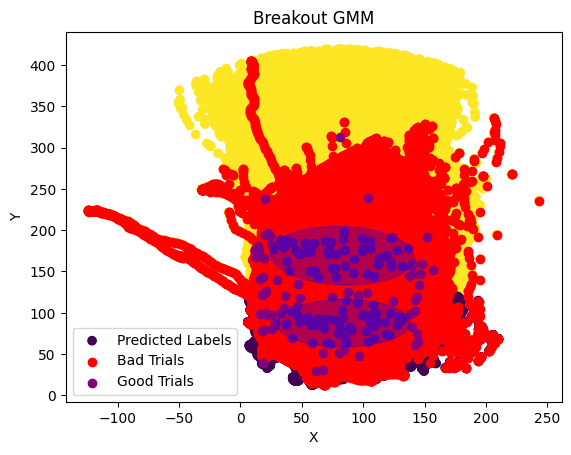

In [35]:
# General Plot
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

# Separate coordinates and labels
points = np.array([(point[0], point[1]) for point in breakout_gaze])
labels = [point[2] for point in breakout_gaze]
    
# Filter pairs labeled 'bad'
bad_pairs = [point for point in breakout_gaze if point[2] == 'bad']

# Filter pairs labeled 'good'
good_pairs = [point for point in sampled_breakout if point[2] == 'good']

# Separate 'bad' coordinates and labels
bad_points = np.array([(point[0], point[1]) for point in bad_pairs])
bad_labels = [point[2] for point in bad_pairs]

# Separate 'good' coordinates and labels
good_points = np.array([(point[0], point[1]) for point in good_pairs])
good_labels = [point[2] for point in good_pairs]

# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=2)  # Assuming 2 components for this example
gmm.fit(points)

# Predict labels using the GMM
predicted_labels = gmm.predict(points)

# Plot the data points
plt.scatter(points[:, 0], points[:, 1], c=predicted_labels, cmap='viridis', label='Predicted Labels')
   
# Plot 'bad' data points with a different color or marker
plt.scatter(bad_points[:, 0], bad_points[:, 1], c='red', label='Bad Trials')

# Plot 'good' data points with a different color or marker
plt.scatter(good_points[:, 0], good_points[:, 1], c='purple', label='Good Trials')

# Plot the GMM ellipses
for i in range(len(gmm.means_)):
    mean = gmm.means_[i]
    cov = gmm.covariances_[i]
    v, w = np.linalg.eigh(cov)
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180.0 * angle / np.pi
    ell = plt.matplotlib.patches.Ellipse(mean, v[0], v[1], angle=180 + angle, color='blue', alpha=0.3)
    plt.gca().add_patch(ell)

# Set plot labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Breakout GMM')
plt.legend()

# Show the plot
plt.show()


## GMM Plots Using Sampled Subsets

In order to produce an accurate analysis, we must select subsets of the original dataset; this is due to the original dataset being far too large to observe any pattern in the GMM. Subsets of the datasets were selected using random sampling. We're also going to calculate the silhouette scores of 10 randomly sampled subsets each game to study the strength of the clusters formed in the GMM.

In [191]:
# Downsampling datasets
import random

sampled_freeway = random.sample(freeway_gaze, 384)
sampled_breakout = random.sample(breakout_gaze, 384)
sampled_seaquest = random.sample(seaquest_gaze, 384)
sampled_centipede = random.sample(centipede_gaze, 384)
sampled_riverraid = random.sample(riverraid_gaze, 384)
sampled_venture = random.sample(venture_gaze, 384)

In [11]:
# Silhouette score lists to average
freeway_silhouette = []
breakout_silhouette = []
seaquest_silhouette = []
centipede_silhouette = []
riverraid_silhouette = []
venture_silhouette = []

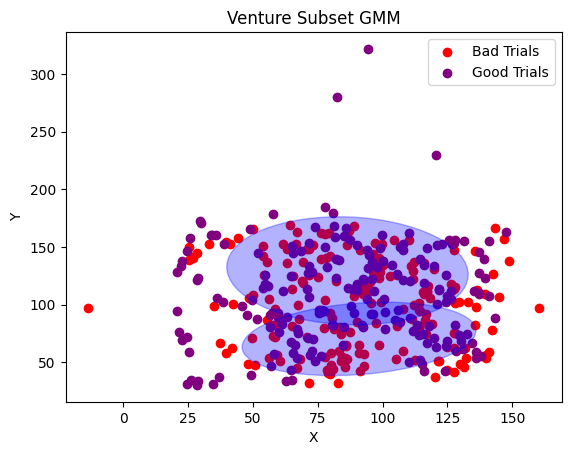

0.3675111777046756


In [192]:
# GMM using downsampled data
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score 

# Separate coordinates and labels
points = np.array([(point[0], point[1]) for point in sampled_venture])
labels = [point[2] for point in sampled_venture]
    
# Filter pairs labeled 'bad'
bad_pairs = [point for point in sampled_venture if point[2] == 'bad']

# Filter pairs labeled 'good'
good_pairs = [point for point in sampled_venture if point[2] == 'good']

# Separate 'bad' coordinates and labels
bad_points = np.array([(point[0], point[1]) for point in bad_pairs])
bad_labels = [point[2] for point in bad_pairs]

# Separate 'good' coordinates and labels
good_points = np.array([(point[0], point[1]) for point in good_pairs])
good_labels = [point[2] for point in good_pairs]
   
# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=2)  # Assuming 2 components for this example
gmm.fit(points)

# Predict labels using the GMM
predicted_labels = gmm.predict(points)

# Plot the data points
#plt.scatter(points[:, 0], points[:, 1], c=predicted_labels, cmap='viridis', label='Predicted Labels')
   
# Plot 'bad' data points with a different color or marker
plt.scatter(bad_points[:, 0], bad_points[:, 1], c='red', label='Bad Trials')

# Plot 'good' data points with a different color or marker
plt.scatter(good_points[:, 0], good_points[:, 1], c='purple', label='Good Trials')

# Plot the GMM ellipses
for i in range(len(gmm.means_)):
    mean = gmm.means_[i]
    cov = gmm.covariances_[i]
    v, w = np.linalg.eigh(cov)
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180.0 * angle / np.pi
    ell = plt.matplotlib.patches.Ellipse(mean, v[0], v[1], angle=180 + angle, color='blue', alpha=0.3)
    plt.gca().add_patch(ell)

# Set plot labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Venture Subset GMM')
plt.legend()

# Show the plot
plt.show()

# Calculating silhouette score
silhouette_avg = silhouette_score(points, predicted_labels)
venture_silhouette.append(silhouette_avg)
print(silhouette_avg)

In [193]:
print(len(venture_silhouette))

10


## Silhouette Scores for Each Game

In [200]:
# Calculating the average of the silhouette scores for each game
import statistics

freeway_average = statistics.mean(freeway_silhouette)
breakout_average = statistics.mean(breakout_silhouette)
seaquest_average = statistics.mean(seaquest_silhouette)
centipede_average = statistics.mean(centipede_silhouette)
riverraid_average = statistics.mean(riverraid_silhouette)
venture_average = statistics.mean(venture_silhouette)

## Boxplot of Silhouette Scores

Here, we're generating a box plot to show the distribution of the silhouette scores for each game to compare.

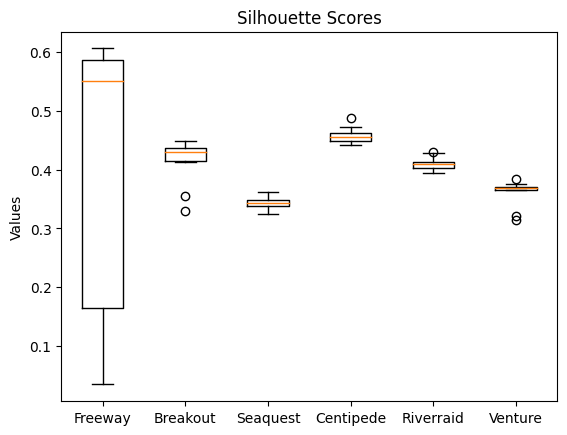

In [203]:
# Box plot
import matplotlib.pyplot as plt
import numpy as np

# Create a list of data to be plotted
data_to_plot = [freeway_silhouette, breakout_silhouette, seaquest_silhouette,
                centipede_silhouette, riverraid_silhouette, venture_silhouette]

# Create a box plot
plt.boxplot(data_to_plot)

# Add labels to the plot
plt.title('Silhouette Scores')
plt.xticks([1, 2, 3, 4, 5, 6], ['Freeway', 'Breakout', 'Seaquest',
                                'Centipede', 'Riverraid', 'Venture'])
plt.ylabel('Values')

# Show the plot
plt.show()
